In [ ]:
Aurthor - Aritha Mindula Jayaratne
Student ID - s4683873 
Subject name - Predictive analysis (BCO6008)


LOAN PREDICTION MACHINE LEARNING ALGORITHMS. 

In [3]:
#Import the libraries needed for the project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/OneDrive/Desktop/Predictive Analytics/Assessment 1/assessment2_dataset.csv")

1.	Business understanding.
Prosperity bank is a leading financial institution, the bank is committed on improving customer satisfaction and prioritizing innovation while focusing on solutions. The bank aims to streamline and improve the loan qualification process by leveraging machine learning algorithms. This part of the report gives the reader an understanding of the business side of the machine learning model. This report focusses on the CRISP-DM model, objectives, scopes, stakeholders and the criteria of the project. 

Objective:
Main objective of this initiative us to automate and predict the loan qualification process of the bank using the information gathered from forma submitted by the customers. By implementing machine learning models, the bank aims to improve the prediction of the loan granting  process and also ensure the efficiency and the decision making process to achieve business goals. The automation of this process will enhance customer experience and optimize internal operations while aligning with banks commitment to innovate customer centric solutions
. 
Success Criteria:
Improved loan approval raises: Increase in the acyuracy of the loan approval predictions which will lead to higher and efficient approval rates for eligible customers. 
Reduced processing times: Loan processing times will drastically decrease when evaluating loans which will result in faster responses to the customers.
Enhanced customer satisfaction: An overall improvement in customer experience due to streamlining this process using machine learning. 
Regulatory Compliance: Making sure the machine learning models and the gathered data are meeting the relevant data and privacy policies of the company and the government. 



2.	Data understanding. 
The relevant data needed for this project was obtained internally through prosperity bank. The collection of the data was done through forms which was handed out to the customers who has applied for loans through the bank. The data which was given to the data team was in a tabular format, primarily as a csv file. The given data set to train and test the models consisted of 13 columns and there was roughly 560 – 610 rows of data in each column. A graphical representation is shown for the reader to have an understanding on the data set. The dataset consist of various types of variables which includes numerical and categorical data. The main data types present in the dataset is strings, integers, and floats. 


In [4]:
df.shape

(610, 13)

In [5]:
df.head() # We got some categorical data, and it's a binary classification (Yes, NO)

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval_Status
0,LP00031,Male,Yes,0,Graduate,No,9329,0,Rural,189.0,180.0,1.0,Y
1,LP00032,Male,Yes,2,Graduate,No,2043,1619,Rural,102.0,360.0,1.0,Y
2,LP00033,Male,Yes,0,Graduate,No,4754,2331,Urban,129.0,360.0,1.0,Y
3,LP00034,Male,No,0,Not Graduate,No,2721,0,Urban,59.0,180.0,1.0,Y
4,LP00035,Male,Yes,0,Graduate,No,2998,3419,Semiurban,56.0,180.0,1.0,Y


In [6]:
df.info() # There are some missing values in the data set. will clean them further down the code.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


In [7]:
df.describe() # Describe the numerical data in the data set. 

,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Credit_History
count,610.000000,610.000000,592.000000,596.000000,560.000000
mean,5415.578689,1622.114754,146.459459,341.879195,0.841071
std,6126.143268,2935.113192,85.597858,65.322153,0.365936
min,147.000000,0.000000,9.000000,12.000000,0.000000
25%,2882.750000,0.000000,101.000000,360.000000,1.000000
50%,3813.000000,1150.000000,127.500000,360.000000,1.000000
75%,5793.750000,2299.500000,167.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:

df['Credit_History'] = df['Credit_History'].astype('O') # change the type of Credit_History to object becaues we can see that it is 1 or 0

df.describe(include='O')


,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Location,Credit_History,Approval_Status
count,610,597,607,595,610,578,610,560.0,610
unique,610,2,2,4,2,2,3,2.0,2
top,LP00031,Male,Yes,0,Graduate,No,Semiurban,1.0,Y
freq,1,485,395,343,478,496,233,471.0,418


In [9]:
df.drop('Loan_ID', axis=1, inplace=True) # we will drop ID because it's not important for our model and it will just mislead the model

df.duplicated().any()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                597 non-null    object 
 1   Marital_Status        607 non-null    object 
 2   Number_of_Dependents  595 non-null    object 
 3   Education_Level       610 non-null    object 
 4   Independent_Worker    578 non-null    object 
 5   Applicant_Income      610 non-null    int64  
 6   Coapplicant_Income    610 non-null    int64  
 7   Location              610 non-null    object 
 8   Amount_Requested      592 non-null    float64
 9   Term                  596 non-null    float64
 10  Credit_History        560 non-null    object 
 11  Approval_Status       610 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 57.3+ KB


Exploratory data analysis. 

Before starting the EDA for the given data set, the data set id examined to get an understanding about the data and provides information about the missing data in the data set. Also, the code will describes about the numerical and the categorical features of the data set. Also, the Credit_histroy column will be turned into an object type data and further down the analysis it will be turned back again into an integer to be fed into the model. Loan_ID column is removed as it is not important for the analysis and if the column is kept without dropping it will affect the efficiency of the code. These steps will help to understand the data structure and it is ready for the model training
The Approval_Status column is the target variable or dependent variable, and the other variables will all be independent variables. The code snippet will analyze and visualize the approval rate of the loans and will calculate the percentage for each approval class. Which is denoted by Y and N. The below graph will give a clear understanding about the dependent variable and how it is distributed on the data set
The bar shows the approval rate for two classes. Based on the height of the bars the Y has a higher approval rate than the N. percentage wise the result for Y is 0.69 and for N is 0.31. Accordingly, there is an imbalance in the data but for now will consider it as no imbalance and do further analysis. The first part of the analysis is about the categorical features which are also the independent features which will be used in the model.  The first variable is the Credit_History column. . 


object


C:\Users\user\AppData\Local\Temp\ipykernel_27360\321399598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Approval_Status', palette='viridis')


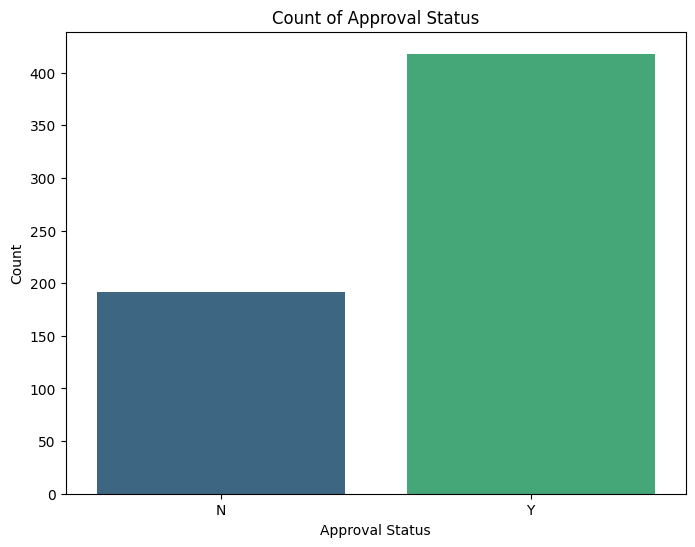

In [10]:
# Check the approval status of loans to get a idea of the approval rate of the data set. According to the percentage 0.69 has been approved and 0.31 percent has been denied. 

print(df['Approval_Status'].dtype) 
df['Approval_Status'] = df['Approval_Status'].astype('category')
# Plot countplot
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Approval_Status', palette='viridis')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.title('Count of Approval Status')
plt.show()

In [11]:
print('The percentage of Y class : %.2f' % (df['Approval_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Approval_Status'].value_counts()[1] / len(df)))

The percentage of Y class : 0.69
The percentage of N class : 0.31


C:\Users\user\AppData\Local\Temp\ipykernel_27360\3765238664.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The percentage of Y class : %.2f' % (df['Approval_Status'].value_counts()[0] / len(df)))
C:\Users\user\AppData\Local\Temp\ipykernel_27360\3765238664.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The percentage of N class : %.2f' % (df['Approval_Status'].value_counts()[1] / len(df)))


In [12]:
#Exploring the data further to gain insights before creating the models. 

df.columns

#The first part of the explotary analysis will include the categorical data. 

df.head(5)

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval_Status
0,Male,Yes,0,Graduate,No,9329,0,Rural,189.0,180.0,1.0,Y
1,Male,Yes,2,Graduate,No,2043,1619,Rural,102.0,360.0,1.0,Y
2,Male,Yes,0,Graduate,No,4754,2331,Urban,129.0,360.0,1.0,Y
3,Male,No,0,Not Graduate,No,2721,0,Urban,59.0,180.0,1.0,Y
4,Male,Yes,0,Graduate,No,2998,3419,Semiurban,56.0,180.0,1.0,Y


Credit_History. 

With the count on the y-axis and the credit history on the x-axis, the graph resembles a bar chart. "Approval Status = Y" and "Approval Status = N" are the labels of the two bars, respectively. 
A class imbalance is suggested by the height of the bars. Class Y has received more approvals than class N. This may indicate that the two classes differ fundamentally in a way that influences the likelihood of loan approval. For example, class Y may have innate qualities that increase the likelihood that applications will be accepted, or the data that was used to create the graph may be skewed in favor of class Y. All things considered, the graph points to a possible relationship between credit history and loan approval status, with a higher credit history (possibly class Y) associated with a higher likelihood of approval. 


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


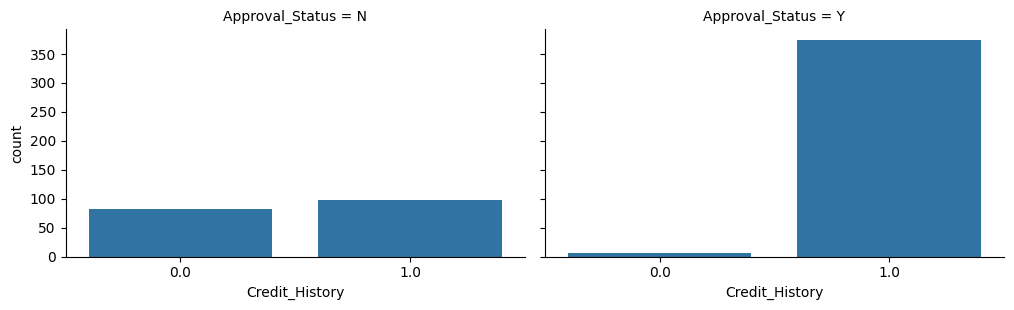

In [13]:
#credit_History
grid = sns.FacetGrid(df, col='Approval_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

Gender. 

According to the count plot there isn't any noticeable variation in loan approval rates between genders. In simple terms, the quantity of male approvals seems to be comparable to the quantity of female approvals in both graphs (Approved, Denied). This graph suggests that gender may not be a very reliable indicator of loan approval in this dataset. The decisions about approval might be influenced more by other factors. There for further analysis on other variables will be conducted. 



C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


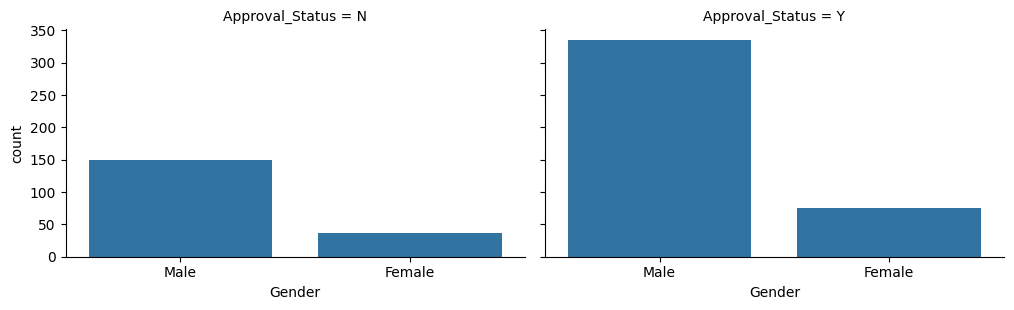

In [14]:
#GENDER
grid = sns.FacetGrid(df,col='Approval_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

Marital_Status.

On the graph the blue bar heights suggest that a greater percentage of married customers than single customers were granted loans. These are some possible explanations for this incident. Married couples may be viewed by lenders as lower risk borrowers because they have a combined higher income and better credit history. Also due to their higher likelihood of having dependents, married individuals may be seen by lenders as more responsible borrowers. Overall, the graph points to a potential relationship between loan approval and marital status, with married applicants possibly having a higher chance of being approved. This is a good feature for the models to be trained on. 


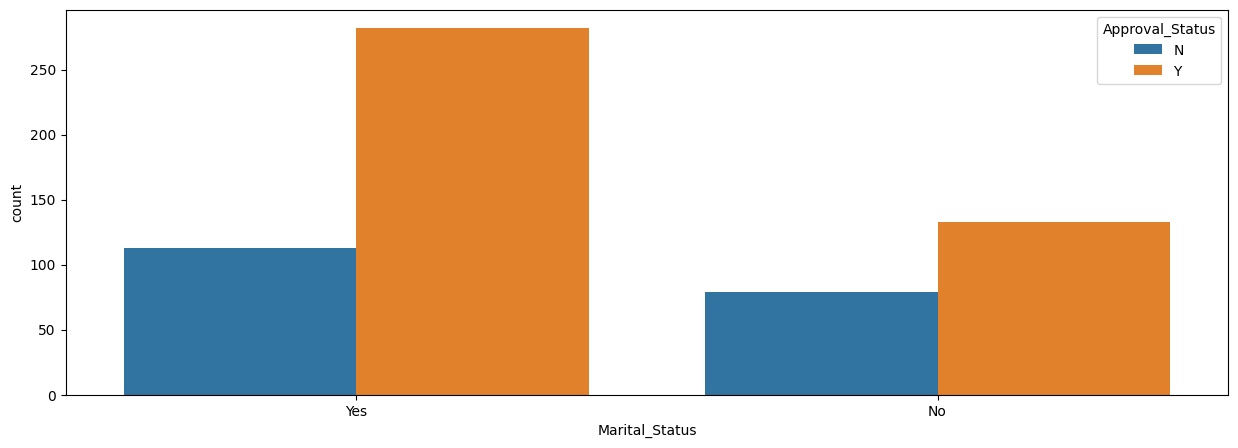

In [15]:
# 3.Marital_Status 
plt.figure(figsize=(15,5))
sns.countplot(x='Marital_Status', hue='Approval_Status', data=df);

Number_of_Depedents.

On the chart  with the count displayed on the y-axis and the number of dependents (0, 1, 2, 3+) displayed on the x-axis.  It demonstrates, for example, that there are more applicants with no dependents than there are with three or more.
A loan forecasting model's suitability for incorporating the number of dependents is based upon several factors, such as the nature of the loan and the borrower's credit history . Furthermore more dependents are generally viewed as a greater financial burden on the borrower , which may be harder for an applicant to repay a loan on time. But there are other things to take into account as well, like the borrowers income  and the income of their spouse or partner which could make difference. Another key feature to notice is that if the dependent count is zero then there is a high chance of getting a loan. There for we will consider this  as a good featuer to train our model down  the case study. 




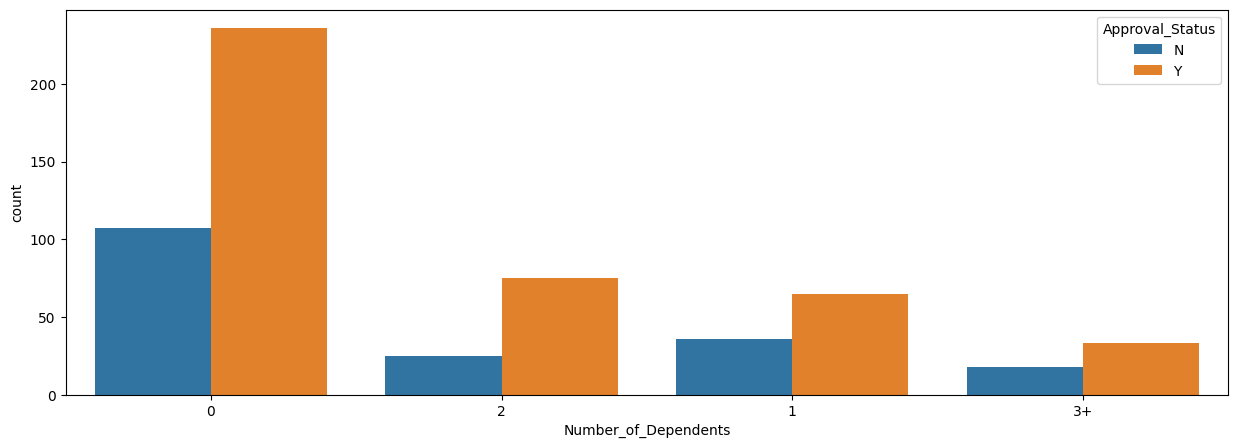

In [16]:
# DEPEDENTS

plt.figure(figsize=(15,5))
sns.countplot(x='Number_of_Dependents', hue='Approval_Status', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

EDUCATION_LEVEL

The height of the bar in this stacked bar graph indicates the total number of individuals at each educational level. The number of individuals whose loan was approved (approval status = Y) is represented by the blue portion of the bar, while the number of individuals whose loan was denied (approval status = N) is represented by the other portion of the bar.As the graduate bar is higher than the non-graduate bar, the graph suggests that a greater percentage of the population in this dataset is a graduate.It appears that graduates have a higher approval rate. Compared to the "non-graduate" bar, a greater percentage of the "graduate" bar is blue.Despite the smaller blue section in the "non-graduate" bar representing a lower approval rate, it's crucial to remember that a sizable portion of non-graduates still had their loans approved.Although the graph suggests that the feature might be promising, it should be used cautiously and in conjunction with other pertinent features to create an all-encompassing and equitable loan prediction model. In that case the feature will not be considered.





C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


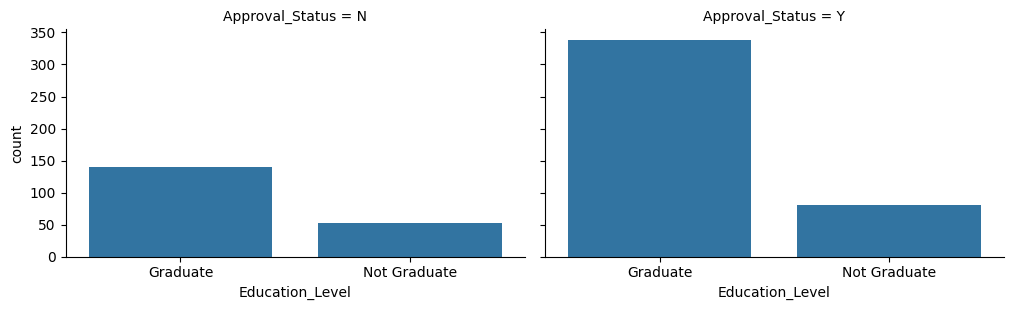

In [17]:
grid = sns.FacetGrid(df,col='Approval_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education_Level');

Location.

The bar graph depicts the distribution of loan approval status across three types of locations: Rural, Urban, and Semiurban. From the visual data, it's evident that Semiurban areas have a noticeably higher number of loan approvals (Y) than disapprovals (N). This suggests that applicants from Semiurban areas might have a better chance of loan approval compared to those from Rural and Urban areas. Such a trend can be attributed to various socio-economic factors which may make Semiurban residents more eligible for loans in the eyes of lenders, such as stable incomes, property values, or other demographic and economic criteria.T the location feature showgood potentialal as a predictor in a loan prediction model. The data suggests that including 'Location' could improve the model’s accuracy by capturing the apparent variance in loan approval rates between different areas. When constructing a predictive model, it’s important to note that while the 'Location' feature appears to be a good indicator of loan approval likelihood, it should be used in conjunction with other features to ensure a comprehensive analysis.



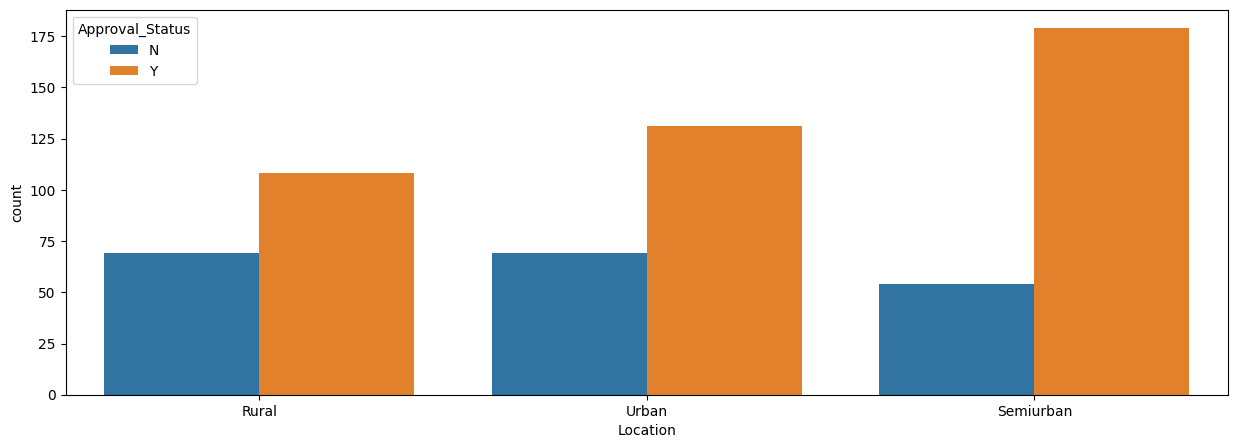

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Location', hue='Approval_Status', data=df);

Self_employeed

The graph compares the approval status of loans against the employment type, specifically focusing on independent workers. Notably, a larger number of independent workers have their loans approved (Y) than disapproved (N). However, the count of non-independent workers with loan approvals is significantly higher. Despite this, the data suggests that being an independent worker does not show a strong correlation with loan approval status.Considering this analysis, the employment type 'Independent Worker' does not appear to significantly influence the loan approval process. This conclusion is drawn from the fact that the proportion of approvals to disapprovals within the 'Yes' category for independent workers is not substantially different from the 'No' category. Therefore, including 'Independent Worker' as a feature in a loan prediction model might not substantially improve its predictive power

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


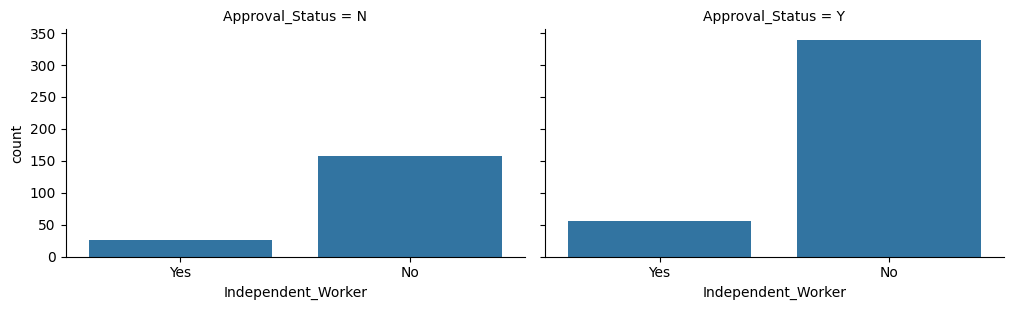

In [19]:
grid = sns.FacetGrid(df,col='Approval_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Independent_Worker');


Applicant income. 

The image is a box plot comparing the distribution of applicant income between two loan approval statuses: 'N' for no and 'Y' for yes. The box plot for both categories shows the median income, the interquartile range (IQR), and outliers.From the plot, it is noticeable that the median income for those with an approval status of 'Y' is slightly higher than for those with a status of 'N'. Moreover, there are outliers on both sides, but especially for the 'Y' category, indicating that a few applicants with very high incomes were approved.Applicant income could be a good predictor for a loan prediction model as it likely correlates with the ability to repay a loan. However, the overlap in the income ranges between approved and not approved applicants suggests that while income should be considered, it should not be the sole determinant in the prediction model. Other factors, such as the loan amount, credit history.

Text(0, 0.5, 'Applicant Income')

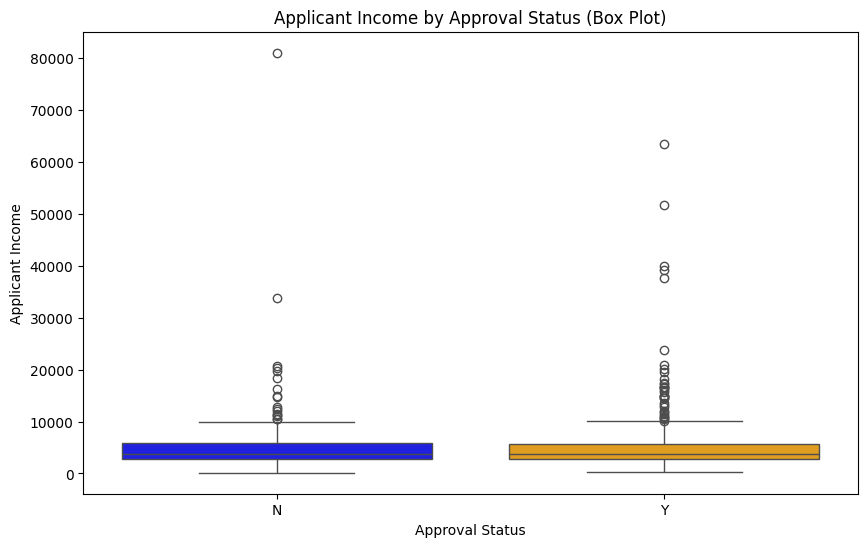

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Approval_Status', y='Applicant_Income', hue='Approval_Status', data=df, palette=['blue', 'orange'], dodge=False)
plt.title('Applicant Income by Approval Status (Box Plot)')
plt.xlabel('Approval Status')
plt.ylabel('Applicant Income')

Analysis on the Numerical data.

Median.

The below code calculates the median of the four numerical indepedant features (columns) on the data set. According to the results, 'Amount_Requested' seems to be the most accurate feature for predicting the status of loan approval. This is due to the fact that there is a noticeable difference in the median amount that applicants in the 'Y' (approved) and 'N' (rejected) categories request. In particular, the median amount sought for loans that are approved (designated as "Y") is marginally less than the median amount requested for loans that are rejected (designated as "N"), which is marginally greater ($130.0). 'Amount_Requested' is therefore a crucial feature for the loan prediction model since it appears to be a discriminating factor in predicting the status of loan approval.

In [21]:
#calculate the medians of the numerical dataset based on the approval status column.

median_values = df.groupby('Approval_Status', observed=True)[['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term']].median()
median_values

,Applicant_Income,Coapplicant_Income,Amount_Requested,Term
Approval_Status,,,,
N,3833.5,267.5,130.0,360.0
Y,3813.0,1223.0,127.0,360.0


Correlation.

According to the correlation results, 'Amount_Requested' (correlation coefficient = 0.043450) is the feature that has the highest correlation with the loan approval status, 'Approval_Status'. This implies that there is a small correlation between the status of loan approval and 'Amount_Requested'. Despite the generally low correlation coefficients on all the tested features, 'Amount_Requested' continues to be the feature most closely linked to the approval status. Thus, of all the features analysed here, it is the most suitable for a loan prediction model.

In [63]:
correlation_matrix = df[['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term', 'Approval_Status']].corr()
print(correlation_matrix)

                    Applicant_Income  Coapplicant_Income  Amount_Requested  \
Applicant_Income            1.000000           -0.116293          0.544342   
Coapplicant_Income         -0.116293            1.000000          0.184997   
Amount_Requested            0.544342            0.184997          1.000000   
Term                       -0.045844           -0.058492          0.039416   
Approval_Status             0.003382            0.059105          0.043450   

                        Term  Approval_Status  
Applicant_Income   -0.045844         0.003382  
Coapplicant_Income -0.058492         0.059105  
Amount_Requested    0.039416         0.043450  
Term                1.000000         0.021545  
Approval_Status     0.021545         1.000000  


3. Data Preperation.

Data prepration is making the data suitable to be fed into the machine learning models, pre-processing, cleaning, and coding the categorical data into numerics which is known as coding  are all part of data preparation. This stage could involve activities like feature engineering, handling missing values, eliminating outliers, and combining data from several sources. Each code will be explained with results for the reader to undersatnd each step of the data preperation process. 

In [22]:
#Install the needed libraries and load them into the script. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Corrected import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
df.isnull().sum().sort_values(ascending=False) # check the data set for missing values and add them up to have an understanding.
df['Approval_Status'] = df['Approval_Status'].astype(object) # Approval column will be converted into a string type from integer type.


In [34]:
# We will separate the numerical columns from the categorical

#create two empty lists 
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes): # check if the data type is an object    
    if c == object:
        cat_data.append(df.iloc[:, i]) # if the data type is a object append it to cat_data
    else :
        num_data.append(df.iloc[:, i]) #if numeric append it to num_data

In [35]:
cat_data = pd.DataFrame(cat_data).transpose() #convert the categorical data into a data frame and transpose the dataset
num_data = pd.DataFrame(num_data).transpose() #convert the numerical data into a data frame and transpose the dataset

In [36]:
num_data.head() # check the 5 rows of the num_data set

,Applicant_Income,Coapplicant_Income,Amount_Requested,Term
0,9329.0,0.0,189.0,180.0
1,2043.0,1619.0,102.0,360.0
2,4754.0,2331.0,129.0,360.0
3,2721.0,0.0,59.0,180.0
4,2998.0,3419.0,56.0,180.0


In [37]:
cat_data.head() # check the 5 rows of the cat_data set

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Location,Credit_History,Approval_Status
0,Male,Yes,0,Graduate,No,Rural,1.0,Y
1,Male,Yes,2,Graduate,No,Rural,1.0,Y
2,Male,Yes,0,Graduate,No,Urban,1.0,Y
3,Male,No,0,Not Graduate,No,Urban,1.0,Y
4,Male,Yes,0,Graduate,No,Semiurban,1.0,Y


In [38]:
# fill every column with its own most frequent value you can use
# Fill missing values in categorical data columns with the most frequent value in each column
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

C:\Users\user\AppData\Local\Temp\ipykernel_27360\611042843.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))


False

In [39]:
# num_data
# fill every missing value with the backward fill method.
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data 

C:\Users\user\AppData\Local\Temp\ipykernel_27360\1646775828.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill', inplace=True)


False

In [40]:
from sklearn.preprocessing import LabelEncoder  # import the LabelEncoder class from thepre processing module.
le = LabelEncoder()# Initialize a LabelEncoder object
cat_data.head() 

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Location,Credit_History,Approval_Status
0,Male,Yes,0,Graduate,No,Rural,1.0,Y
1,Male,Yes,2,Graduate,No,Rural,1.0,Y
2,Male,Yes,0,Graduate,No,Urban,1.0,Y
3,Male,No,0,Not Graduate,No,Urban,1.0,Y
4,Male,Yes,0,Graduate,No,Semiurban,1.0,Y


In [41]:
target_values = {'Y': 0 , 'N' : 1} # Define a dictionary to map target values from 'Y' to 0 and from 'N' to 1

target = cat_data['Approval_Status'] # Extract the target variable from the categorical data
cat_data.drop('Approval_Status', axis=1, inplace=True) # Remove the 'Approval_Status' column from the categorical data DataFrame

target = target.map(target_values) # Map the target variable values using the defined dictionary

In [42]:
# transform other columns

for i in cat_data: # Iterate through each column in the categorical data DataFrame 
    cat_data[i] = le.fit_transform(cat_data[i])  # Use the LabelEncoder object to fit and transform each column

In [43]:
target.head() # Display the rows of the target variable

0    0
1    0
2    0
3    0
4    0
Name: Approval_Status, dtype: int64

In [44]:
cat_data.head() # show the rows of the modified categorical data Dataset

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Location,Credit_History
0,1,1,0,0,0,0,1
1,1,1,2,0,0,0,1
2,1,1,0,0,0,2,1
3,1,0,0,1,0,2,1
4,1,1,0,0,0,1,1


In [45]:
df = pd.concat([cat_data, num_data, target], axis=1) Concatenate or bring all the datasets together. 

In [46]:
df.head() # show the new data frame.

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Location,Credit_History,Applicant_Income,Coapplicant_Income,Amount_Requested,Term,Approval_Status
0,1,1,0,0,0,0,1,9329.0,0.0,189.0,180.0,0
1,1,1,2,0,0,0,1,2043.0,1619.0,102.0,360.0,0
2,1,1,0,0,0,2,1,4754.0,2331.0,129.0,360.0,0
3,1,0,0,1,0,2,1,2721.0,0.0,59.0,180.0,0
4,1,1,0,0,0,1,1,2998.0,3419.0,56.0,180.0,0


4. Modeling 

Three machine learning models will be used in this section. those models are going to be KNeighbourClassifier, Desicion forest Classifier and the random forest model. To evaluate and compare the three models these evaluation criteria will be used and explained as to which model is the best fit for the loan prediction model. The criteria are accuracy,precision, recall and the F1 score will be used to evaluate the model. And the data will be divided into a 8:20 split. the train data set will be 80% and the testing data set will be 20%.


In [66]:
#Import the neeed libraries and modules. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


In [67]:
X = df.drop('Approval_Status', axis=1) # Create the feature matrix X by dropping the 'Approval_Status' column and leaving the other columns as it is. 
y = df['Approval_Status'] # target vector y is the dependent variable which is the approval status in this case. it will be stored in y.


In [68]:
# Spliting  the dataset into training and testing sets, with 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Set random_state to 42 for reproducibility. this will be the same when you run this code over and over again. 
#it will make sure that the data is split as the same as before. 

In [69]:
# Intialize the three models which are going to be used. 

knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()

In [70]:
# Creating a dictionary of the models for easier access
models = {'KNN': knn, 'Decision Tree': dtree, 'Random Forest': rforest}

In [71]:
# This function will train and evaluate multiple models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        # Training the 3 models
        model.fit(X_train, y_train)
        # Making predictions
        y_pred = model.predict(X_test)
        # Evaluating the models 
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        # Printing the evaluation criteria mentioned on documentation. 
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}\n")

# Training and evaluating the models
train_and_evaluate(models, X_train, y_train, X_test, y_test)

Model: KNN
Accuracy: 0.5820
Precision: 0.2083
Recall: 0.1351
F1-Score: 0.1639

Model: Decision Tree
Accuracy: 0.7623
Precision: 0.6333
Recall: 0.5135
F1-Score: 0.5672

Model: Random Forest
Accuracy: 0.8115
Precision: 1.0000
Recall: 0.3784
F1-Score: 0.5490



5. Evaluation of the model.

According to the results genarted from the three models a analysis will be conducted to see whcih model is the best fit for the company as a loan predictor.A thourgh explanation will be given as to which model is the best and why the company should select this model.

To select which is the best model, compare the performnaces of the KNN, Decision tree and Random Forest based on it's accuracy,precision,recall and F1-score. 

KNN model:

Accuracy - 58.20% this is the lowest accuracy rate of the 3 models. this indicates that it's loan approval status is 58.20% correct.
Precision - 20.83% This percenatage is very low precision and this indicates that when the model predicts a loan approval it is correct only 20.83% times.
Recall - The low recall suggest that it indentifies 13.51% of all the actual loan approvals.
F1 score - The KNN has the lowest score and this indicates that there is a poor stability between precision and recall 


Decision Tree Model: 

Accuracy - 76.23% Can observe a noticible improvement over the KNN model but still lower than the random forest model. 
Precision - 63.33% indicates that the is a reasonably a good rate of correct predictions of the loan approval.
Recall - 51.23% when observing the recall more than half of the actual loan approvals are identified.
F1 score - 56.72% can say that there is a balance between the precision and recall and it is better than the KNN model but it is not high given the vlues of the precision and the recall values.

Random Forest Model:

Accuracy - 81.15% this model has the highest accuracy rate of all the models and this indicates that the highest overall rate of predicting correctly.
Precision - 100% rate means that every prediction of the loan approval by the model is corect and this is a ideal way of avoiuding the false positives.
Recall - 37.84% is lower than the decsion tree which means it identifies a lesser number of loan approvals.
F1 score - 54.90% even though the model had a higher precision, the low recall, value affects the F1 score of the model. 


In conclusion the best model for the bank based on it's objectives is the Random forest model. The reasoning behind this is that the model has the highest accuracy rate an dthe precisionrate out of the other models. This means that the random forest model is very relaible model when predicting.when the model predicts loan approvals it is definitely correct. But the recall of this model is lower than the decision tree. in this case can conclude that it is more conservatuve when granting loans. this could lead to the model missing out on customers who are actually eligble for the loan. the bank should consider tuning this model and featuer engineering to improve the recall values without effecting the precision value.Also the team needs to monitor the model frequently by adding new features and by training the model without fetures to see if the models predicts the outcome more accurately. 
A vizulaization has been shown for the reader to have a more clear understanding of the values predicted by all three models. 

Next phase of the preoject will be deployement phase of this model and how it can be integrated with the system of prosperity bank. 



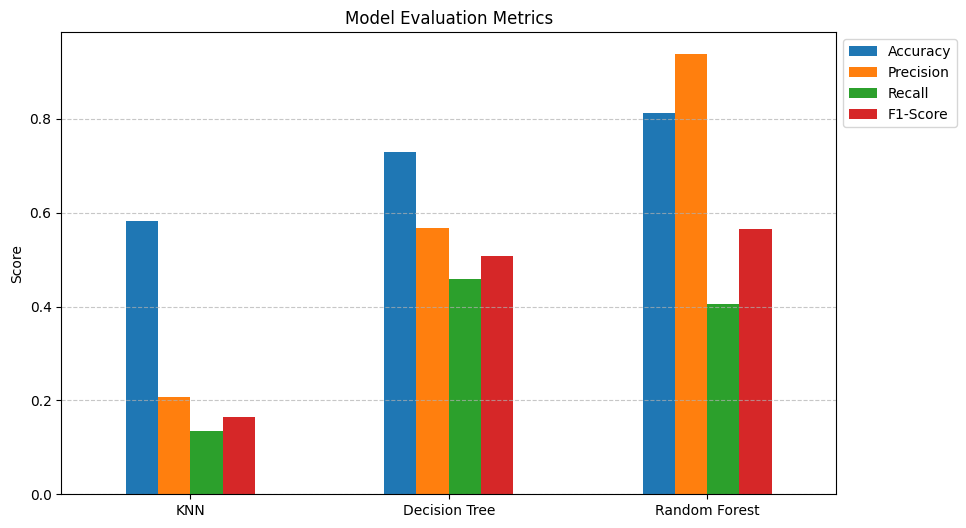

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest']

# Evaluation metrics for each model
accuracy = [0.5820, 0.7295, 0.8115]
precision = [0.2083, 0.5667, 0.9375]
recall = [0.1351, 0.4595, 0.4054]
f1_score = [0.1639, 0.5075, 0.5660]

# Creating a DataFrame from the metrics
df_metrics = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}, index=models)

# Plotting
df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)  # Rotate model names for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

6. Deployment.

After evaluating and thouruoghly examining the results of the models. The teams of the bank will begin the deployment of the model into the banks infasstructure. In this case it will be implemented into the loan department of the banking. In this case the selecetd model is the random forest classifier which has the highest accuaracy rate of all three models and this model matches the banks objectivves to predict and approve the auto loan system for cutomers. After uploading the model into the banks internal servers or the cloud platforms. Using a API the bank can genarate real time predictions from this model.

And this model needs to monitored and it's performances needs to tracked byusing new data to make sure that the model is stable and it predicts the correct results which the bank wants for its loan approval. And lastly the data governance team should make sure that the predictive nmodel which is implemented does not breach any data governance policies. This is a must as banks hold very sensitive information and one small mistake could be a huge loss to the bank. 
